In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [3]:
# Load the data
data = pd.read_csv('../data/all_data_featured.csv')

data['target_coded'] = data['transportation_mode'].astype('category').cat.codes

In [14]:
model_columns = ['Acceleration x (m/s^2)',
       'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)',
       'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)', 'Latitude (°)_kalman',
       'Longitude (°)_kalman', 'Horizontal Accuracy (m)_kalman',
       'Acceleration x (m/s^2)_kalman', 'Acceleration y (m/s^2)_kalman',
       'Acceleration z (m/s^2)_kalman', 'Gyroscope x (rad/s)_kalman',
       'Gyroscope y (rad/s)_kalman', 'Gyroscope z (rad/s)_kalman', 'accel_tot',
       'accel_var_1s', 'accel_var_8s', 'accel_var_15s', 'delta_x',
       'velocity_new_(m/s)', 'jerk_tot_1s', 'jerk_tot_8s', 'jerk_tot_15s',
       'accel_tot_1s', 'accel_tot_8s', 'target_coded']

model_data = data[model_columns].ffill().bfill()

In [20]:
X = model_data.drop('target_coded',axis=1)
y = model_data['target_coded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
svm_params = {'C': [0.1, 1],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear']} 

svm_model = svm.SVC()
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy', verbose=1)
svm_grid.fit(X_train, y_train)
svm_best_model = svm_grid.best_estimator_
svm_preds = svm_best_model.predict(X_test)

print(f"SVM Best Parameters: {svm_grid.best_params_}")
print(f"SVM Model Accuracy: {accuracy_score(y_test, svm_preds)}")
print(f"SVM Model F1: {f1_score(y_test, svm_preds, average='weighted')}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVM Model Accuracy: 0.9998509242695289
SVM Model F1: 0.9998509373853594


In [22]:
knn_params = {
    'n_neighbors': [5, 50, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy', verbose=1)
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_
knn_preds = knn_best_model.predict(X_test)

print(f"KNN Best Parameters: {knn_grid.best_params_}")
print(f"KNN Model Accuracy: {accuracy_score(y_test, knn_preds)}")
print(f"KNN Model F1: {f1_score(y_test, knn_preds, average='weighted')}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
KNN Model Accuracy: 0.9998509242695289
KNN Model F1: 0.9998509536270571


In [28]:
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', verbose=1)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_
rf_preds = rf_best_model.predict(X_test)

print(f"Random Forest Best Parameters: {rf_grid.best_params_}")
print(f"Random Forest Model Accuracy: {accuracy_score(y_test, rf_preds)}")
print(f"Random Forest Model F1: {f1_score(y_test, rf_preds, average='weighted')}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Model Accuracy: 1.0
Random Forest Model F1: 1.0


<Axes: ylabel='feature'>

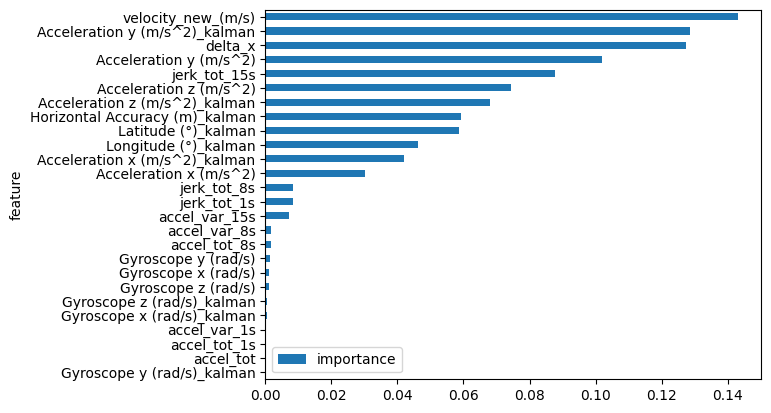

In [31]:
df = pd.DataFrame({'feature':rf_best_model.feature_names_in_,'importance':rf_best_model.feature_importances_}).sort_values('importance')
df.plot.barh(x='feature', y='importance')